In [1]:
import os
import glob
import pickle

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# /data/MAR2_al/MAR2_hpl/65k_64_56/round0/preprocessing/round0.pkl

In [9]:
cores = '65k_64_56'

BASE_DIR     = f"../../data/MAR2_al/MAR2_hpl/{cores}/"   # point this at the “14” folder
DATA_DIR     = f"../../results/{cores}/"

In [186]:
import os
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# --- 1. Load a sample MAR2_hpl round -------------------
def load_round_pkl(base_dir, round_name="round0"):
    """
    Load the roundX.pkl for a given HPL configuration
    """
    pkl_path = os.path.join(base_dir, round_name, "preprocessing", f"{round_name}.pkl")

    print(pkl_path)
    
    with open(pkl_path, "rb") as f:
        data = pickle.load(f)
    return data

def plot_time_series(df, metric="", cores_to_plot=None):
    """
    Plot time series for a given metric (e.g., 'temp_core', 'clk_ref_core').
    """
    if cores_to_plot is None:
        cores_to_plot = df.columns[:100]  # first 10 cores
    plt.figure(figsize=(10, 4))
    for core in cores_to_plot:
        plt.plot(df.index, df[core])
    plt.title(metric)
    plt.xlabel("Time")
    plt.ylabel(metric)
    # plt.legend()
    plt.tight_layout()
    plt.show()

In [187]:
data = load_round_pkl(BASE_DIR)

../../data/MAR2_al/MAR2_hpl/65k_64_56/round0/preprocessing/round0.pkl


In [188]:
data.keys()

dict_keys(['temp_core', 'clk_ref_core', 'aperf_core', 'mperf_core', 'tsc_core', 'ThermStat_core', 'C0_norm_tsc_core', 'C1_norm_tsc_core', 'C3_norm_tsc_core', 'C6_norm_tsc_core', 'C7_norm_tsc_core', 'C0_norm_tsc_freq_core', 'amx_ops_retired.bf16_core', 'amx_ops_retired.int8_core', 'C1_core', 'C3_core', 'C6_core', 'C7_core', 'fp_arith_inst_retired.128b_packed_double_core', 'fp_arith_inst_retired.128b_packed_single_core', 'fp_arith_inst_retired.256b_packed_double_core', 'fp_arith_inst_retired.256b_packed_single_core', 'fp_arith_inst_retired.512b_packed_double_core', 'fp_arith_inst_retired.512b_packed_single_core', 'freq_aperf_mperf_core', 'busy_core', 'topdown_retiring_slots_core', 'topdown_bad_spec_slots_core', 'topdown_fe_bound_slots_core', 'topdown_be_bound_slots_core', 'topdown_metrics_core', 'topdown_slots_core', 'temp_pkg_cpu', 'PLR_cpu', 'powCTL_cpu', 'C2_cpu', 'C3_cpu', 'C6_cpu', 'power_from_erg_pkg_cpu'])

In [189]:
data['C0_norm_tsc_core'].shape

(859, 112)

# Example visualizations

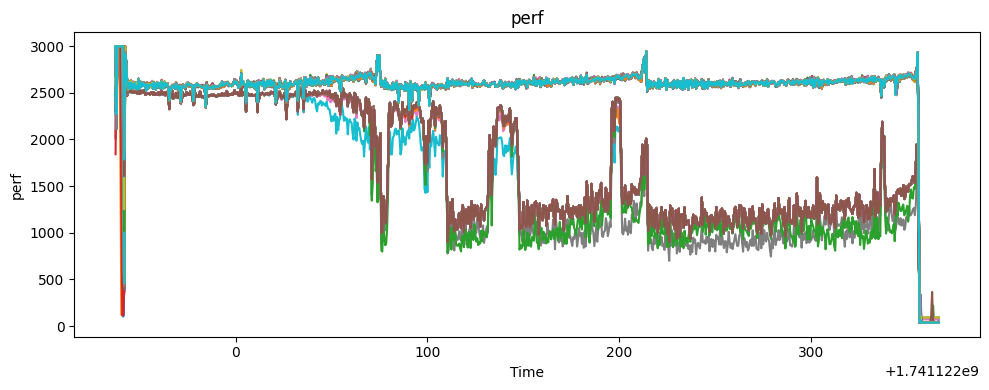

In [190]:
plot_time_series(data['C0_norm_tsc_freq_core'], "perf")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Extract unique normalized frequency values ---
freq_df = data["C0_norm_tsc_freq_core"]
uniq_vals = np.unique(freq_df.values)[None, :].T  # shape (U, 1)

# --- 2. Evaluate inertia and silhouette for k = 2..10 ---
ks = list(range(2, 11))
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0).fit(uniq_vals)
    inertias.append(km.inertia_)
    # silhouette_score requires at least 2 clusters and fewer clusters than samples
    labels = km.labels_
    silhouettes.append(silhouette_score(uniq_vals, labels))

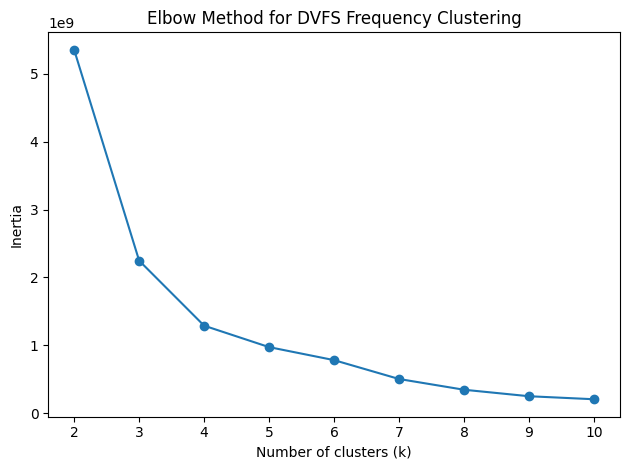

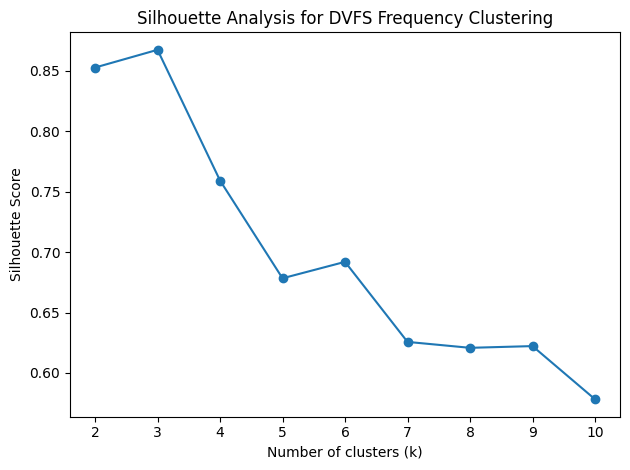

In [95]:
# --- 3. Plot Elbow Method (Inertia vs k) ---
plt.figure()
plt.plot(ks, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for DVFS Frequency Clustering")
plt.tight_layout()
plt.show()

# --- 4. Plot Silhouette Scores vs k ---
plt.figure()
plt.plot(ks, silhouettes, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for DVFS Frequency Clustering")
plt.tight_layout()
plt.show()